In [341]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

df_train = pd.read_csv('train.csv')

In [342]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [343]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [344]:
# drop columns that have so many missing values
df_train.drop(['Alley'],axis=1,inplace=True)
df_train.drop(['PoolQC'],axis=1,inplace=True)
df_train.drop(['Fence'],axis=1,inplace=True)
df_train.drop(['MiscFeature'],axis=1,inplace=True)

df_train.drop(['Id'],axis=1,inplace=True) # not important

In [345]:
# fill missing values

#float:
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean()) 
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].mean()) 
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mean()) 

# objects:
df_train['BsmtCond'] = df_train['BsmtCond'].fillna(df_train['BsmtCond'].mode()[0])
df_train['BsmtQual'] = df_train['BsmtQual'].fillna(df_train['BsmtQual'].mode()[0])
df_train['BsmtExposure'] = df_train['BsmtExposure'].fillna(df_train['BsmtExposure'].mode()[0])
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].fillna(df_train['BsmtFinType1'].mode()[0])
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].fillna(df_train['BsmtFinType2'].mode()[0])
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])
df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna(df_train['FireplaceQu'].mode()[0])
df_train['GarageType'] = df_train['GarageType'].fillna(df_train['GarageType'].mode()[0])
df_train['GarageFinish'] = df_train['GarageFinish'].fillna(df_train['GarageFinish'].mode()[0])
df_train['GarageQual'] = df_train['GarageQual'].fillna(df_train['GarageQual'].mode()[0])
df_train['GarageCond'] = df_train['GarageCond'].fillna(df_train['GarageCond'].mode()[0])
df_train['MasVnrType'] = df_train['MasVnrType'].fillna(df_train['MasVnrType'].mode()[0])

In [346]:
df_train['PropertyAge'] = df_train['YrSold'] - df_train['YearBuilt']


In [347]:
df_train.isna().any()

MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinSF1       False
BsmtFinType2     False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
1stFlrSF         False
2ndFlrSF         False
LowQualFinS

In [348]:
df_train.shape

(1460, 77)

In [349]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [350]:
categorical_columns = df_train.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [351]:
len(categorical_columns)

39

In [352]:
def one_hot_encode(df, columns):
    df_encoded = pd.get_dummies(df, columns=columns, drop_first=True)
    return df_encoded

In [353]:
encoded_train_df = one_hot_encode(df_train, categorical_columns)
encoded_train_df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=238)

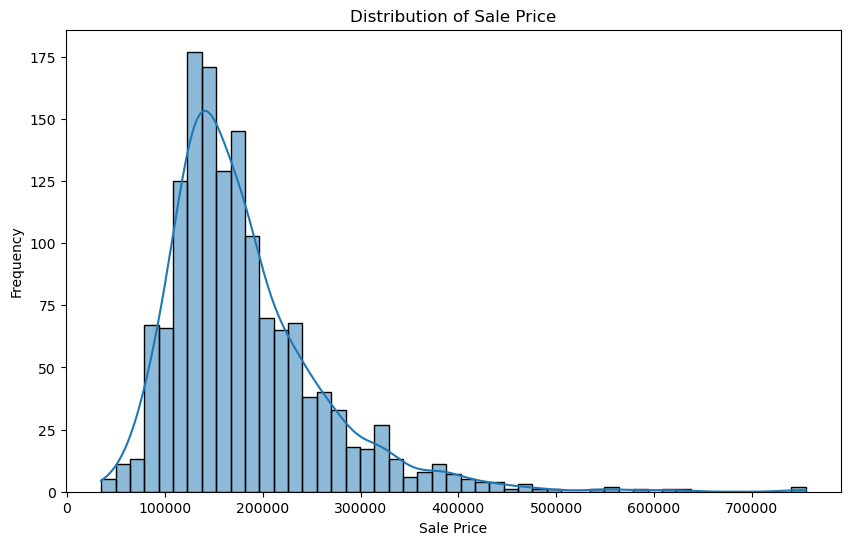

In [354]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='SalePrice', kde=True)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

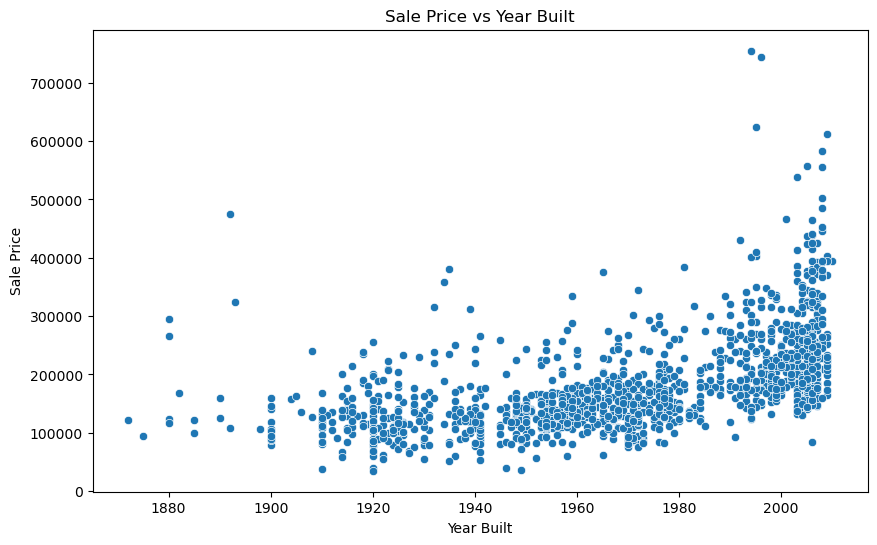

In [355]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_train, x='YearBuilt', y='SalePrice')
plt.title('Sale Price vs Year Built')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.show()

C:\Users\nadaa\AppData\Local\Temp\ipykernel_88604\3063713289.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_train, x='MSZoning', y='SalePrice', estimator='mean', ci=None)


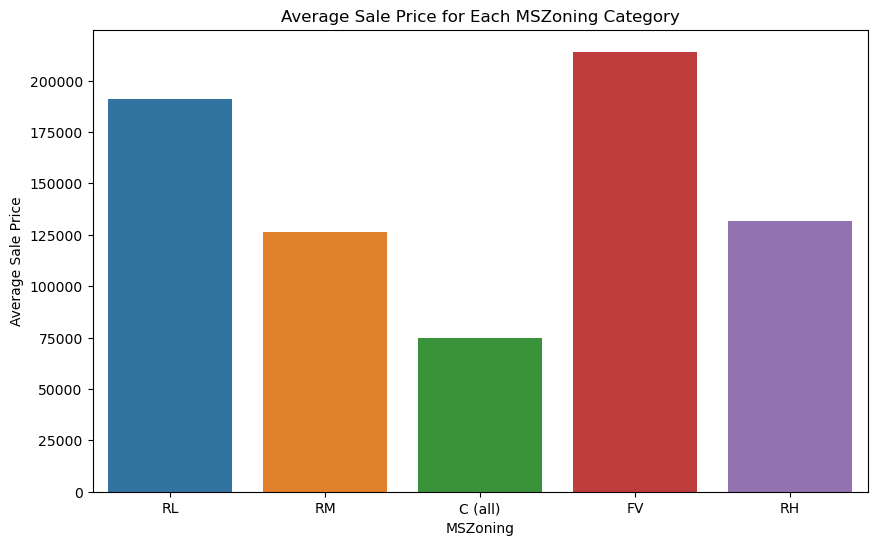

In [356]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_train, x='MSZoning', y='SalePrice', estimator='mean', ci=None)
plt.title('Average Sale Price for Each MSZoning Category')
plt.xlabel('MSZoning')
plt.ylabel('Average Sale Price')
plt.show()

In [357]:
encoded_train_df.shape

(1460, 238)

In [358]:
final_train = encoded_train_df
scaler = StandardScaler()
numerical_columns = final_train.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns.drop('SalePrice', errors='ignore')
final_train[numerical_columns] = scaler.fit_transform(final_train[numerical_columns])

In [359]:
final_train[numerical_columns].agg(['mean', 'std'])


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,PropertyAge
mean,-8.455945e-17,4.075887e-16,-5.840077e-17,1.387018e-16,3.540547e-16,1.046347e-15,4.496860e-15,-3.406712e-17,-2.433366e-17,-3.406712e-17,-6.600504e-17,2.457699e-16,6.509253e-17,-1.825024e-17,1.216683e-17,-1.277517e-16,2.311697e-17,2.433366e-17,1.180182e-16,2.083569e-17,2.141362e-16,4.501726e-16,-1.022014e-16,-4.866731e-18,3.939010e-15,1.216683e-16,-1.216683e-17,5.596741e-17,3.041707e-17,-2.311697e-17,4.866731e-18,5.475072e-17,1.946692e-17,-2.676702e-17,7.543433e-17,3.567436e-14,5.110068e-17
std,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00


In [360]:
final_train.shape

(1460, 238)

In [361]:
len(numerical_columns)

37

In [362]:
df_test = pd.read_csv('test.csv')

In [363]:
df_test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [364]:
# drop columns that have so many missing values
df_test.drop(['Alley'],axis=1,inplace=True)
df_test.drop(['PoolQC'],axis=1,inplace=True)
df_test.drop(['Fence'],axis=1,inplace=True)
df_test.drop(['MiscFeature'],axis=1,inplace=True)


df_test.drop(['Id'],axis=1,inplace=True) # not important

In [365]:
columns_with_null = df_test.columns[df_test.isnull().any()]
df_with_null = df_test[columns_with_null]
print(df_with_null.dtypes)


MSZoning         object
LotFrontage     float64
Utilities        object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1      float64
BsmtFinType2     object
BsmtFinSF2      float64
BsmtUnfSF       float64
TotalBsmtSF     float64
BsmtFullBath    float64
BsmtHalfBath    float64
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageCars      float64
GarageArea      float64
GarageQual       object
GarageCond       object
SaleType         object
dtype: object


In [366]:
# fill missing values

#float:
df_test['LotFrontage'] = df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean()) 
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].mean()) 
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mean()) 
df_test['BsmtFinSF1'] = df_test['BsmtFinSF1'].fillna(df_test['BsmtFinSF1'].mean()) 
df_test['BsmtFinSF2'] = df_test['BsmtFinSF2'].fillna(df_test['BsmtFinSF2'].mean()) 
df_test['BsmtUnfSF'] = df_test['BsmtUnfSF'].fillna(df_test['BsmtUnfSF'].mean()) 
df_test['TotalBsmtSF'] = df_test['TotalBsmtSF'].fillna(df_test['TotalBsmtSF'].mean()) 
df_test['BsmtFullBath'] = df_test['BsmtFullBath'].fillna(df_test['BsmtFullBath'].mean()) 
df_test['BsmtHalfBath'] = df_test['BsmtHalfBath'].fillna(df_test['BsmtHalfBath'].mean()) 
df_test['GarageCars'] = df_test['GarageCars'].fillna(df_test['GarageCars'].mean()) 
df_test['GarageArea'] = df_test['GarageArea'].fillna(df_test['GarageArea'].mean()) 



# objects:
df_test['BsmtCond'] = df_test['BsmtCond'].fillna(df_test['BsmtCond'].mode()[0])
df_test['BsmtQual'] = df_test['BsmtQual'].fillna(df_test['BsmtQual'].mode()[0])
df_test['BsmtExposure'] = df_test['BsmtExposure'].fillna(df_test['BsmtExposure'].mode()[0])
df_test['BsmtFinType1'] = df_test['BsmtFinType1'].fillna(df_test['BsmtFinType1'].mode()[0])
df_test['BsmtFinType2'] = df_test['BsmtFinType2'].fillna(df_test['BsmtFinType2'].mode()[0])
df_test['Electrical'] = df_test['Electrical'].fillna(df_test['Electrical'].mode()[0])
df_test['FireplaceQu'] = df_test['FireplaceQu'].fillna(df_test['FireplaceQu'].mode()[0])
df_test['GarageType'] = df_test['GarageType'].fillna(df_test['GarageType'].mode()[0])
df_test['GarageFinish'] = df_test['GarageFinish'].fillna(df_test['GarageFinish'].mode()[0])
df_test['GarageQual'] = df_test['GarageQual'].fillna(df_test['GarageQual'].mode()[0])
df_test['GarageCond'] = df_test['GarageCond'].fillna(df_test['GarageCond'].mode()[0])
df_test['MasVnrType'] = df_test['MasVnrType'].fillna(df_test['MasVnrType'].mode()[0])
df_test['MSZoning'] = df_test['MSZoning'].fillna(df_test['MSZoning'].mode()[0])
df_test['Utilities'] = df_test['Utilities'].fillna(df_test['Utilities'].mode()[0])
df_test['Exterior1st'] = df_test['Exterior1st'].fillna(df_test['Exterior1st'].mode()[0])
df_test['Exterior2nd'] = df_test['Exterior2nd'].fillna(df_test['Exterior2nd'].mode()[0])
df_test['KitchenQual'] = df_test['KitchenQual'].fillna(df_test['KitchenQual'].mode()[0])
df_test['Functional'] = df_test['Functional'].fillna(df_test['Functional'].mode()[0])
df_test['SaleType'] = df_test['SaleType'].fillna(df_test['SaleType'].mode()[0])

In [367]:
df_test['PropertyAge'] = df_test['YrSold'] - df_test['YearBuilt']

In [368]:
df_test.shape

(1459, 76)

In [369]:
df_test.isna().any()

MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinSF1       False
BsmtFinType2     False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
1stFlrSF         False
2ndFlrSF         False
LowQualFinS

In [370]:
encoded_test_df = one_hot_encode(df_test, categorical_columns)
encoded_test_df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=221)

In [371]:
encoded_test_df.shape

(1459, 221)

In [372]:
final_test = encoded_test_df
scaler = StandardScaler()
numerical_columns2 = final_test.select_dtypes(include=['float64', 'int64']).columns
final_test[numerical_columns2] = scaler.fit_transform(final_test[numerical_columns2])

In [373]:
final_train.shape


(1460, 238)

In [374]:
final_test.shape

(1459, 221)

In [375]:
missing_columns = set(final_train.columns) - set(final_test.columns)
print(missing_columns)
for col in missing_columns:
    final_test[col] = 0

{'Condition2_RRAe', 'RoofMatl_Membran', 'Exterior1st_ImStucc', 'RoofMatl_CompShg', 'Condition2_RRNn', 'GarageQual_Fa', 'Heating_GasA', 'Condition2_RRAn', 'Exterior2nd_Other', 'Utilities_NoSeWa', 'HouseStyle_2.5Fin', 'RoofMatl_Roll', 'Electrical_Mix', 'RoofMatl_Metal', 'Exterior1st_Stone', 'Heating_OthW', 'SalePrice'}


In [376]:
final_test.shape

(1459, 238)

In [377]:
final_test.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'Condition2_RRAn', 'Exterior2nd_Other', 'Utilities_NoSeWa',
       'HouseStyle_2.5Fin', 'RoofMatl_Roll', 'Electrical_Mix',
       'RoofMatl_Metal', 'Exterior1st_Stone', 'Heating_OthW', 'SalePrice'],
      dtype='object', length=238)

In [378]:
final_train.shape

(1460, 238)

In [379]:
final_test=final_test.drop(columns=['SalePrice'])

In [388]:
# MODEL 1

y = final_train['SalePrice']
X = final_train.drop(columns=['SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


pca = PCA(n_components=214)  
X_train_pca = pca.fit_transform(X_train_scaled)

X_test_pca = pca.transform(X_test_scaled)

model = LinearRegression()
model.fit(X_train_pca, y_train)


y_test_pred = model.predict(X_test_pca)
y_train_pred = model.predict(X_train_pca)


train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print('test mse: ', test_rmse)
print('train mse: ', train_rmse)
print('test r2: ', test_r2)
print('train r2: ', train_r2)

test mse:  29959.645677858272
train mse:  23544.65796804542
test r2:  0.8829801569193009
train r2:  0.9070590600236367


In [381]:
# MODEL 2

y = final_train['SalePrice']
X = final_train.drop(columns=['SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)


y_test_pred_xgb = xgb_model.predict(X_test)
y_train_pred_xgb = xgb_model.predict(X_train)

train_rmse_xgb = mean_squared_error(y_train, y_train_pred_xgb, squared=False)
test_rmse_xgb = mean_squared_error(y_test, y_test_pred_xgb, squared=False)

train_r2_xgb = r2_score(y_train, y_train_pred_xgb)
test_r2_xgb = r2_score(y_test, y_test_pred_xgb)

print('XGBoost test mse: ', test_rmse_xgb)
print('XGBoost train mse: ', train_rmse_xgb)
print('XGBoost test r2: ', test_r2_xgb)
print('XGBoost train r2: ', train_r2_xgb)


XGBoost test mse:  29049.42717864153
XGBoost train mse:  1023.2283296633548
XGBoost test r2:  0.8899826165650571
XGBoost train r2:  0.9998244635139345


In [382]:
test_data = pd.read_csv('test.csv')

In [383]:

final_test_processed = final_test[X_train.columns]

pred_sales_price = xgb_model.predict(final_test_processed)

result_df = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': pred_sales_price})

result_df.to_csv('predicted_sale_prices2.csv', index=False)

In [384]:
result_df.head(7)

,Id,SalePrice
0,1461,125668.406250
1,1462,170514.953125
2,1463,174772.828125
3,1464,176048.421875
4,1465,174874.531250
5,1466,168748.046875
6,1467,179705.609375


In [385]:
final_test_processed = final_test[X_train.columns]

z = pca.transform(final_test_processed)

pred_sales_price = model.predict(z)

# Assuming 'Id' is the column containing IDs in the test data
result_df = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': pred_sales_price})

# Save the predictions to a CSV file
result_df.to_csv('predicted_sale_prices1.csv', index=False)

c:\Users\nadaa\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [386]:
result_df.head(7)

,Id,SalePrice
0,1461,92999.386262
1,1462,130316.233935
2,1463,164924.136096
3,1464,173448.973757
4,1465,151207.554305
5,1466,168429.014230
6,1467,162343.320900
